In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_wine
dset=load_wine()
df=pd.DataFrame(dset.data, columns=dset.feature_names)
df['target']=dset.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\madal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

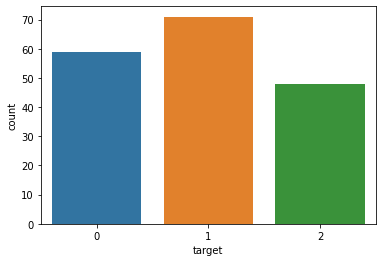

In [12]:
sns.countplot(df['target'])

In [55]:
feature=list(df.columns)
feature.remove('alcohol')
feature.remove('target')
feature

['malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

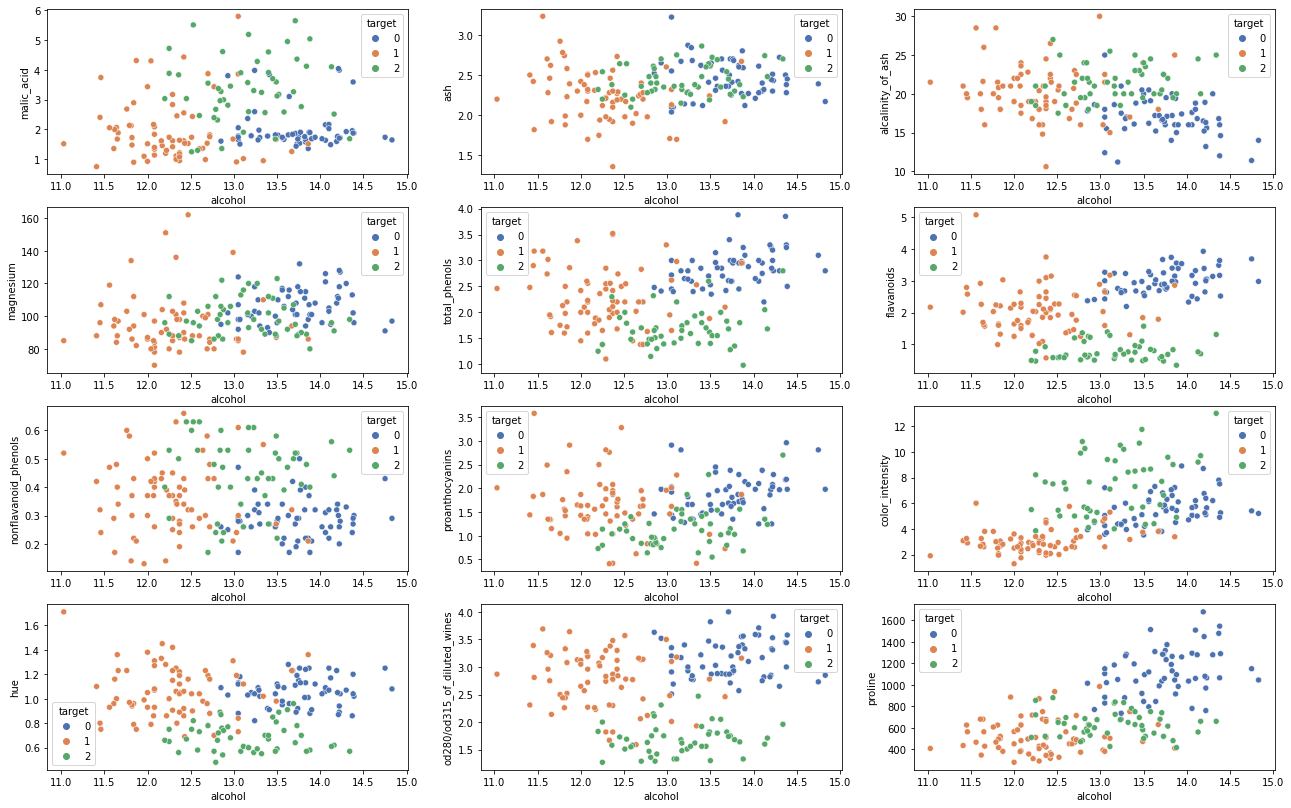

In [61]:
#Visualizing datapoints separably
plt.figure(figsize=(22,14))
#looping through every column and plotting against alcohol
for i,fea in enumerate(feature):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df, x='alcohol', y=fea, hue='target', palette='deep')

In [63]:
#As the classes are linearly separable we can use "linear" kernal in svm
from sklearn.model_selection import train_test_split
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [67]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0])

In [83]:
#Making Confusion_Matrix and performing Classifiaction report
from sklearn.metrics import confusion_matrix, classification_report
con_mat=confusion_matrix(y_pred,y_test)
classf_report=classification_report(y_pred,y_test)
print("Confusion Matrix :\n",pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'],margins=True))
print("\n\n\n",classf_report)

Confusion Matrix :
 Actual      0   1   2  All
Predicted                 
0          17   0   0   17
1           1  18   0   19
2           0   1  17   18
All        18  19  17   54



               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.95      0.95      0.95        19
           2       1.00      0.94      0.97        18

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [84]:
#Computing the accuracy using k-fold_cross_validation 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy : ",accuracies.mean()*100)
print("Standard Deviation : ",accuracies.std()*100)

Accuracy :  95.06410256410255
Standard Deviation :  5.492284349587686
